<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task4_1.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Copyright (C) 2021 by Dmitry Semenov <dmitry.semenov@uef.fi>
#
# Permission to use, copy, modify, and/or distribute this software for any
# purpose with or without fee is hereby granted.
#
# THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH
# REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY
# AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT,
# INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM
# LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR
# OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR
# PERFORMANCE OF THIS SOFTWARE.

In [1]:
import matplotlib.pyplot as plt
import numpy

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read only part of the cube
#  fopen.seek(bytes) - bytes you skip
#  cube = numpy.fromfile(fopen, dtype=numpy.uint16, count=bytes) - bytes you read
path = "/content/drive/MyDrive/ASI/savedata/paintings_Virgin_Mary_0011/capture/paintings_Virgin_Mary_0011.raw"
samples = 2144
bands = 1080
lines = 2667
fopen = open(path, "rb")
line_start = 1000
fopen.seek(samples*bands*line_start*2) # we skip 'line_start' number of lines
line_read = 500
raw_part = numpy.fromfile(fopen, dtype=numpy.uint16, count=samples*bands*line_read) # we read only 'line_read' number of lines
cube_part = numpy.reshape(raw_part, (line_read, bands, samples))
#plt.imshow(cube_part[:,100,:]) 
#plt.show()



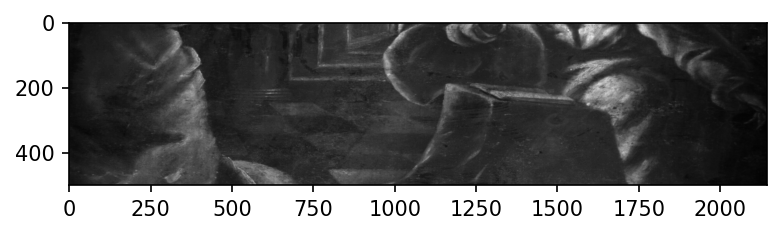

In [8]:
plt.rcParams['figure.dpi'] = 150
plt.imshow(cube_part[:,150,:], cmap="gray")#
plt.show()


In [15]:
# Generate RGB preview without reading whole image (size of 13Gb) but reading only selected bands  of spectral cube: R, G, B = 500, 342, 197
path = "/content/drive/MyDrive/ASI/savedata/paintings_Virgin_Mary_0011/capture/paintings_Virgin_Mary_0011.raw"
samples = 2144
bands = 1080
lines = 2667
data_portion = samples*bands

fopen = open(path, "rb")
#default bands = {510, 334, 162}
R, G, B = 500, 342, 197
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
for line in range(0,lines):
  #fopen.seek(R*2*samples+2*line*samples*bands) 
  fopen.seek(R*samples+line*samples*bands) 
  single_line1 = numpy.fromfile(fopen, dtype=numpy.uint16, count=samples)
  RGB[line,:,0] = single_line1
  
  fopen.seek(G*samples+line*samples*bands) 
  single_line2 = numpy.fromfile(fopen, dtype=numpy.uint16, count=samples)
  RGB[line,:,1] = single_line2
  
  fopen.seek(B*samples+line*samples*bands) 
  single_line3 = numpy.fromfile(fopen, dtype=numpy.uint16, count=samples)
  RGB[line,:,2] = single_line3
fopen.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


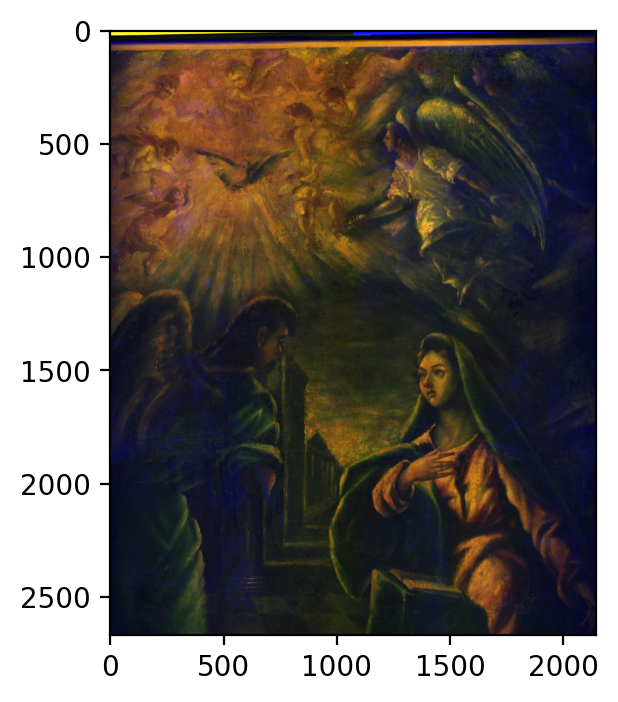

In [16]:
# Show RGB preview
RGB[:,:,0] = 2*RGB[:,:,0] /numpy.amax(RGB[:,:,0])
RGB[:,:,1] = 2*RGB[:,:,1] /numpy.amax(RGB[:,:,1])
RGB[:,:,2] = 2*RGB[:,:,2] /numpy.amax(RGB[:,:,2])
plt.rcParams['figure.dpi'] = 200
#plt.imshow(RGB[:,:,2]/20000) 
plt.imshow(RGB) 
plt.show()


In [ ]:
'''
path = "/content/drive/My Drive/Colab Notebooks/Spectral files/V10 scanner/paintings_Virgin_Mary_13Gb/capture/paintings_Virgin_Mary_0010.raw"
samples = 2144
bands = 1080
lines = 2667
data_portion = samples*bands

fopen = open(path, "rb")
#default bands = {510, 334, 162}
R, G, B = 510, 334, 162
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
for line in range(0,lines):
  fopen.seek(B*samples+line*samples*bands) 
  single_line = numpy.fromfile(fopen, dtype=numpy.uint16, count=samples) 
  #fopen.seek((R+G-1)*2*samples*line) 
  RGB[line,:,0] = single_line
  RGB[line,:,1] = single_line
  RGB[line,:,2] = single_line
fopen.close()
'''



(1333, 54, 1072)


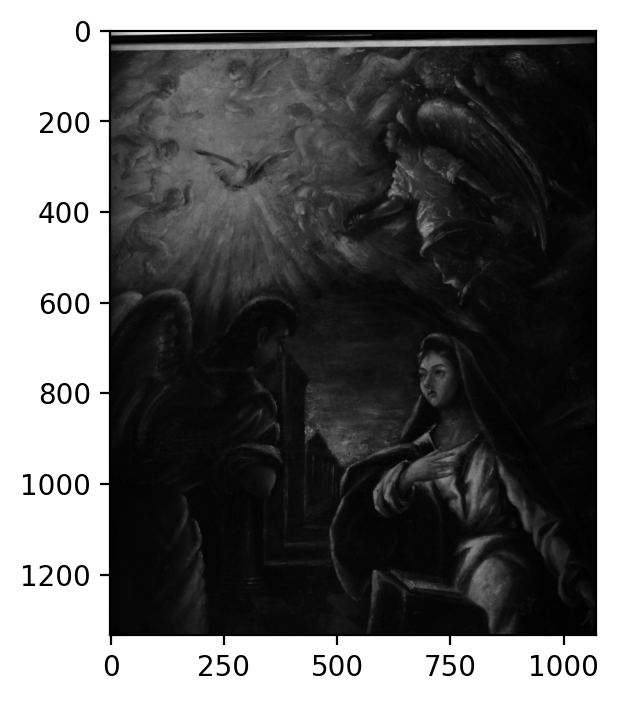

In [19]:
# Read ENVI spectral file [2667, 1080, 2144] size of 13 Gb by parts 
# and create a smaller cube [1333, 54 ,1072]
##################### Read spectral files by parts and resize "online"
# create resize spectral image
# lines   2667 / 2  = 1333
# bands   1080 / 20 = 54
# samples 2144 / 2  = 1072

path = "/content/drive/MyDrive/ASI/savedata/paintings_Virgin_Mary_0011/capture/paintings_Virgin_Mary_0011.raw"

spectral_cube = numpy.empty((1333, 54 ,1072), dtype=numpy.uint16)
# Read one line as 2144 x 1080
data_portion = samples*bands

fopen = open(path, "rb")
nu = 0
for i in range(0,1333): # 1333
    #print(i)
    # SKIP SOME BYTES [data_portion*2*i]
    fopen.seek(data_portion*i*2) 
    # READ ONLY SOME BYTES [count = number of bytes to skip)]
    raw_image = numpy.fromfile(fopen, dtype=numpy.uint16, count=data_portion)# Read line
    #nu = nu + 1
    # skip line
    #nu = nu + 1
    #print(nu)
    cube_part = numpy.reshape(raw_image, (1, bands, samples))
    #print('cube_part.shape: ',cube_part.shape)
    #crop = cube_part[0,::20,::2]
    #print(crop.shape)
    spectral_cube[i,:,:] = cube_part[0,::20,::2]
    
fopen.close()
print(spectral_cube.shape)
plt.imshow(spectral_cube[:,25,:], cmap='gray') 
plt.show()

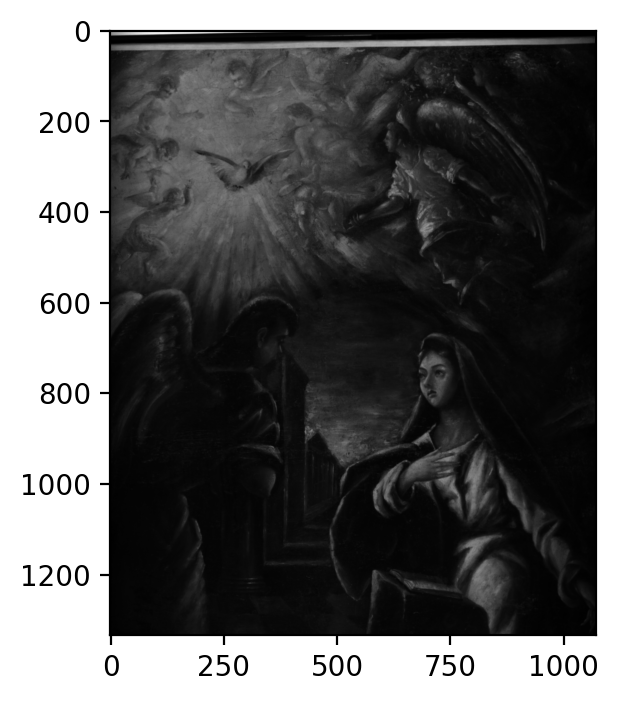

In [21]:
plt.imshow(spectral_cube[:,20,:], cmap='gray') 
plt.show()

In [ ]:
# save as ENVI

saveraw = "/content/drive/MyDrive/Temp results/Big_painting_resized.raw"
fileobj = open(saveraw, mode='wb')

spectral_cube.tofile(fileobj)
fileobj.close()
print(spectral_cube.dtype)
print(spectral_cube.shape)

'''
ENVI
description = {
File Imported into ENVI}
file type = ENVI

samples = 1072
bands = 54
lines = 1333

interleave = bil
data type = 12
header offset = 0
byte order = 0
'''

uint16
(1333, 54, 1072)


'\nENVI\ndescription = {\nFile Imported into ENVI}\nfile type = ENVI\n\nsamples = 1072\nbands = 54\nlines = 1333\n\ninterleave = bil\ndata type = 12\nheader offset = 0\nbyte order = 0\n'